# Import packages

In [3]:
# Import packages

#from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore') # Configuracion warnings

In [6]:
%matplotlib inline

# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
import seaborn as sns
style.use('ggplot') or plt.style.use('ggplot')

#from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore') # Configuracion warnings

# Get data

In [15]:
data = pd.read_csv('selected_X.csv') # data built after using SelectFromModel
# notebooks/Feature_selection____and___PCA_analysis.ipynb
data.shape

(251754, 64)

In [16]:
data = data.loc[:1000, :]
data.shape

(1001, 64)

In [17]:
data.head(2)

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Working,Married,Laborers,Business Entity Type 3,Self-employed
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,2.0,-1134.0,0.0,0.0,1.0,1,0,1,1,0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,1.0,-828.0,0.0,0.0,0.0,0,1,0,0,0


# Finding out the optimal number of clusters

In [18]:
X = data.copy()

In [19]:
X.shape

(1001, 64)

In [20]:
#X = data[['Murder', 'Assault', 'Rape', 'UrbanPop']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
cluster_range = range(1,10)
cluster_errors = []

for num_clusters in cluster_range:
    print("num_clusters : ", num_clusters)
    clusters = KMeans( num_clusters )
    clusters.fit( X_scaled )
    cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

num_clusters :  1
num_clusters :  2
num_clusters :  3
num_clusters :  4
num_clusters :  5
num_clusters :  6
num_clusters :  7
num_clusters :  8
num_clusters :  9


,num_clusters,cluster_errors
0,1,64064.000000
1,2,55640.809033
2,3,52656.935391
3,4,50864.203479
4,5,48790.627338
5,6,47678.190320
6,7,46463.654186
7,8,44502.113501
8,9,43645.230787


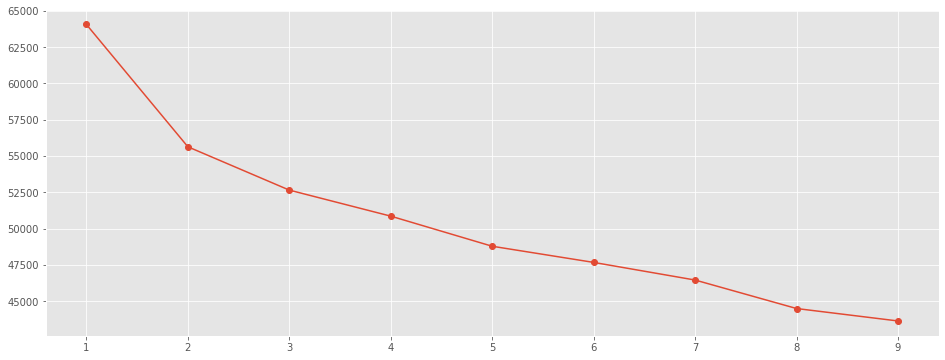

In [21]:
plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

Best number of clusters is 5

In [22]:

clusters = KMeans(n_clusters= 5)  # 5 clusters!
clusters.fit(X)
clusters.cluster_centers_
display(clusters.labels_)

data['Working_clusters'] = clusters.labels_
data.head()
data.sort_values(by=['Working_clusters'],ascending = True)
X.head()

array([4, 1, 0, ..., 4, 0, 4], dtype=int32)

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Working,Married,Laborers,Business Entity Type 3,Self-employed
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,2.0,-1134.0,0.000000,0.000000,1.000000,1,0,1,1,0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,1.0,-828.0,0.000000,0.000000,0.000000,0,1,0,0,0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0.0,-815.0,0.000000,0.000000,0.000000,1,0,1,0,0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,2.0,-617.0,0.282136,0.259934,1.857016,1,0,1,1,0
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0.0,-1106.0,0.000000,0.000000,0.000000,1,0,0,0,0


In [23]:
data.head(2)

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Working,Married,Laborers,Business Entity Type 3,Self-employed,Working_clusters
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,-1134.0,0.0,0.0,1.0,1,0,1,1,0,4
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,-828.0,0.0,0.0,0.0,0,1,0,0,0,1


# Analyze 'DAYS_EMPLOYED' Vs 'AMT_INCOME_TOTAL',

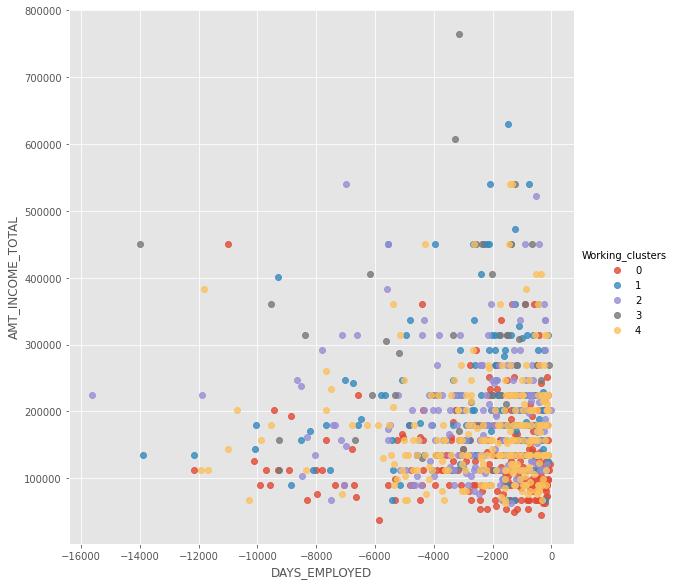

In [24]:
sns.lmplot('DAYS_EMPLOYED' ,'AMT_INCOME_TOTAL', data=data,
        hue = "Working_clusters",
        fit_reg=False, size = 8 );

# Analyze 'DAYS_BIRTH'  Vs 'AMT_INCOME_TOTAL'

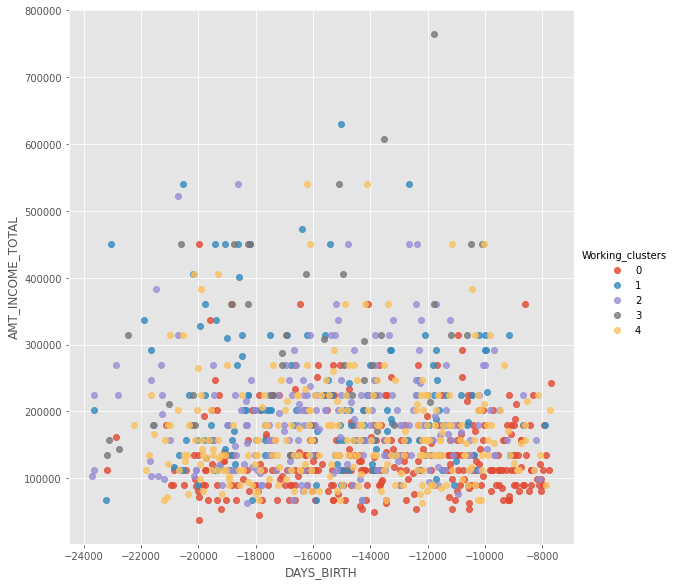

In [25]:
sns.lmplot('DAYS_BIRTH' ,'AMT_INCOME_TOTAL', data=data,
        hue = "Working_clusters",
        fit_reg=False, size = 8 );

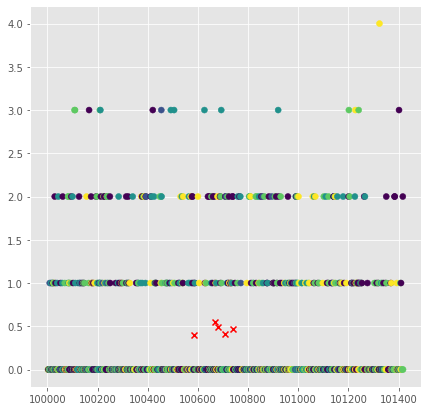

In [26]:
# And same thing using Matplotlib to show also the cluster centers as x:s.

dt=X
clusters = KMeans(5);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;

cmap = plt.cm.get_cmap("Spectral")
labels_p = pd.Series(clusters.labels_)

centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.scatter(dt.iloc[:,0],dt.iloc[:,1], c= labels_p); 
#print(data)
#print(centers)

# Correlations

In [27]:
vars_corr = data
vars_corr.corr() 

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Working,Married,Laborers,Business Entity Type 3,Self-employed,Working_clusters
SK_ID_CURR,1.000000,-0.004333,-0.045601,-0.011167,-0.005780,-0.015880,-0.028543,0.029565,0.028788,-0.002697,...,-0.031785,0.026707,0.014517,0.023093,0.009010,0.033519,-0.044521,-0.011174,0.032986,0.007860
CNT_CHILDREN,-0.004333,1.000000,0.009428,-0.007962,0.008973,-0.004119,-0.074116,0.239988,0.075197,0.177132,...,0.030453,0.007004,-0.003805,0.007745,0.037268,0.176271,-0.002081,-0.033877,0.038935,-0.041907
AMT_INCOME_TOTAL,-0.045601,0.009428,1.000000,0.407609,0.474626,0.425261,0.202621,-0.074296,-0.044394,0.037959,...,0.016666,0.098542,0.000644,0.015957,-0.178910,0.031431,-0.104652,0.032147,0.026089,0.152685
AMT_CREDIT,-0.011167,-0.007962,0.407609,1.000000,0.783283,0.985202,0.089357,-0.213792,-0.147570,-0.010664,...,-0.045263,0.095389,0.021036,0.007864,-0.127592,0.190203,-0.104147,0.009635,-0.054234,0.276415
AMT_ANNUITY,-0.005780,0.008973,0.474626,0.783283,1.000000,0.785260,0.119544,-0.128726,-0.082967,0.004441,...,-0.061420,0.058562,0.020202,0.058332,-0.156041,0.194179,-0.100524,0.020933,-0.031235,0.325999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Married,0.033519,0.176271,0.031431,0.190203,0.194179,0.198995,-0.025159,-0.115894,-0.082349,0.088379,...,-0.085648,0.018456,0.011616,0.061965,0.069731,1.000000,0.017936,-0.024214,-0.051952,0.067463
Laborers,-0.044521,-0.002081,-0.104652,-0.104147,-0.100524,-0.109481,-0.023567,-0.028194,-0.017826,0.050693,...,-0.003571,0.034855,0.007674,0.041371,0.093512,0.017936,1.000000,0.082224,-0.059871,-0.013832
Business Entity Type 3,-0.011174,-0.033877,0.032147,0.009635,0.020933,0.009045,0.038448,0.026618,0.130198,0.033017,...,0.028847,0.035853,0.013143,0.030056,0.039592,-0.024214,0.082224,1.000000,-0.274603,-0.014836
Self-employed,0.032986,0.038935,0.026089,-0.054234,-0.031235,-0.061528,-0.078599,0.056457,0.094406,0.030861,...,-0.002080,-0.024807,0.059412,-0.009943,0.062324,-0.051952,-0.059871,-0.274603,1.000000,-0.007179


# Sort the data according to the four clusters.

In [28]:
stats = data.sort_values("AMT_INCOME_TOTAL", ascending=True)
df_total= pd.DataFrame(stats)

df_total.head(2)

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Working,Married,Laborers,Business Entity Type 3,Self-employed,Working_clusters
544,100743,0,38250.0,47970.0,5166.0,45000.0,0.01885,-19989,-5858,-10339.0,...,-2038.0,0.0,0.0,1.0,1,1,1,1,0,0
660,100904,1,45000.0,348264.0,19575.0,315000.0,0.00712,-17876,-344,-10499.0,...,-712.0,0.0,1.0,2.0,1,1,0,1,0,0


## Cluster 1

In [ ]:
df_total[df_total['Working_clusters'] == 0].sort_values([" "], ascending=True)['State']